# Maze Runner with Heuristic Search
This notebook demonstrates different search algorithms solving the Maze Runner problem.

In [1]:
"""
Author: Ahsan Aziz Ishan
Email: ahsanaziz.ishan@student.univaq.it
Matriculation No: 301131
"""

import numpy as np
import matplotlib.pyplot as plt
from maze_game import MazeGame
from agent import SearchAgent
from tqdm import tqdm

In [2]:
def visualize_maze(game: MazeGame, path=None):
    """Visualize maze with optional solution path"""
    plt.figure(figsize=(8, 8))
    plt.imshow(game.maze, cmap='binary')
    
    if path:
        path_x = [state.position[0] for state in path]
        path_y = [state.position[1] for state in path]
        plt.plot(path_y, path_x, 'r-', linewidth=2, label='Solution Path')
        
    plt.plot(0, 0, 'go', label='Start')
    plt.plot(game.size-1, game.size-1, 'ro', label='Goal')
    plt.grid(True)
    plt.legend()
    plt.show()

## Single Maze Sample Run Example

In [3]:
maze_size = 10
obstacle_ratio = 0.3
game = MazeGame(maze_size, obstacle_ratio, seed=4)
agent = SearchAgent(game)

In [4]:
start_state = game.get_state((0, 0))

In [5]:
algorithms = {
    'Best-First Search': agent.best_first_search,
    'A* Search': agent.astar_search,
    'Greedy Best-First': agent.greedy_best_first_search,
    'Uniform Cost Search': agent.uniform_cost_search
}


Best-First Search Results:
Path length: 21
Nodes expanded: 67
Max frontier size: 19


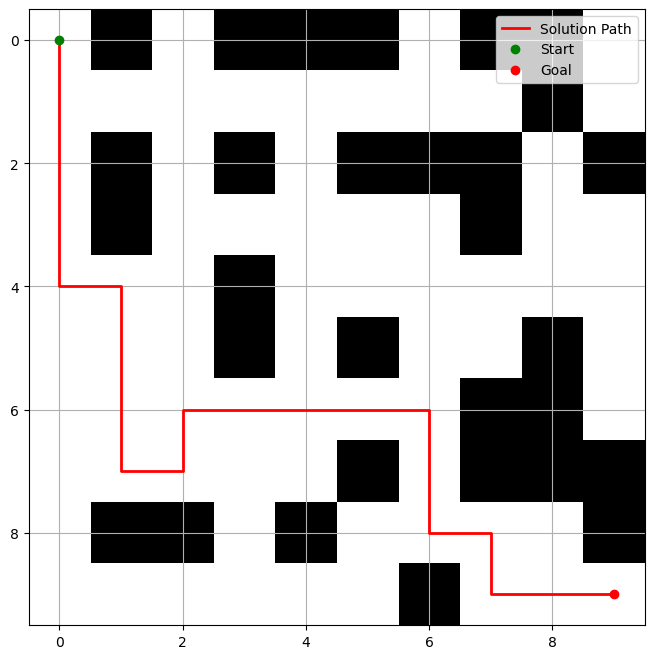


A* Search Results:
Path length: 19
Nodes expanded: 43
Max frontier size: 16


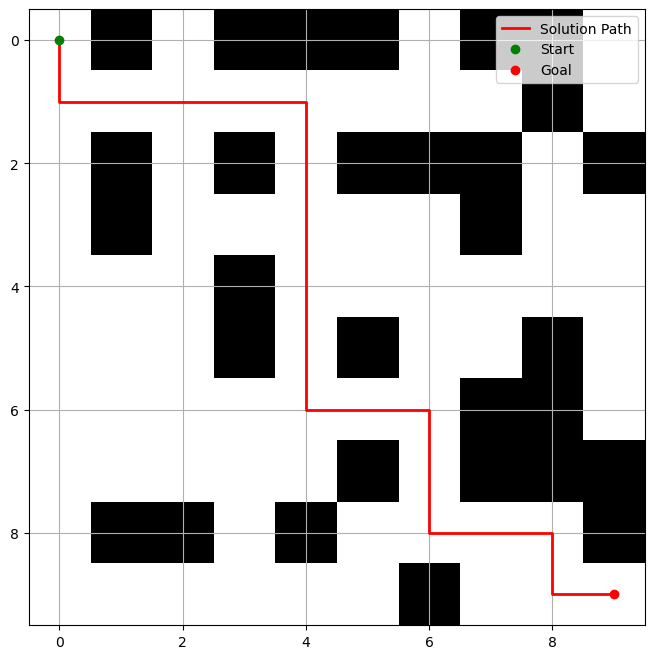


Greedy Best-First Results:
Path length: 21
Nodes expanded: 67
Max frontier size: 19


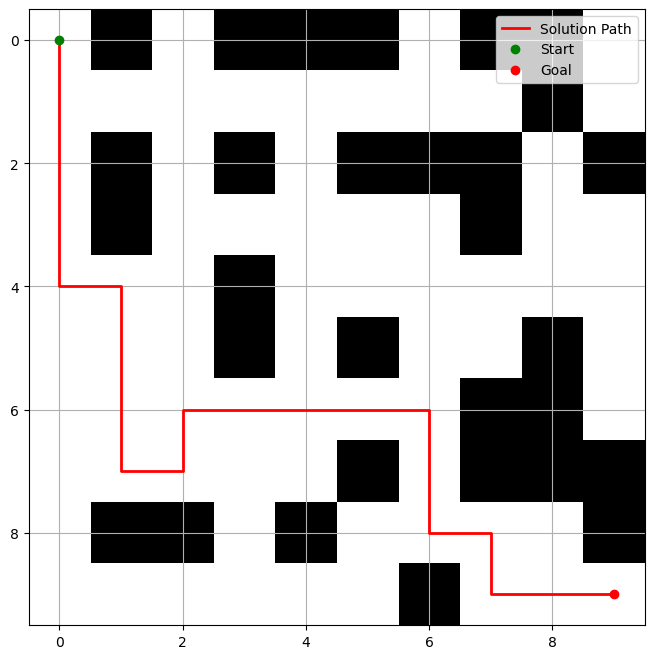


Uniform Cost Search Results:
Path length: 19
Nodes expanded: 67
Max frontier size: 8


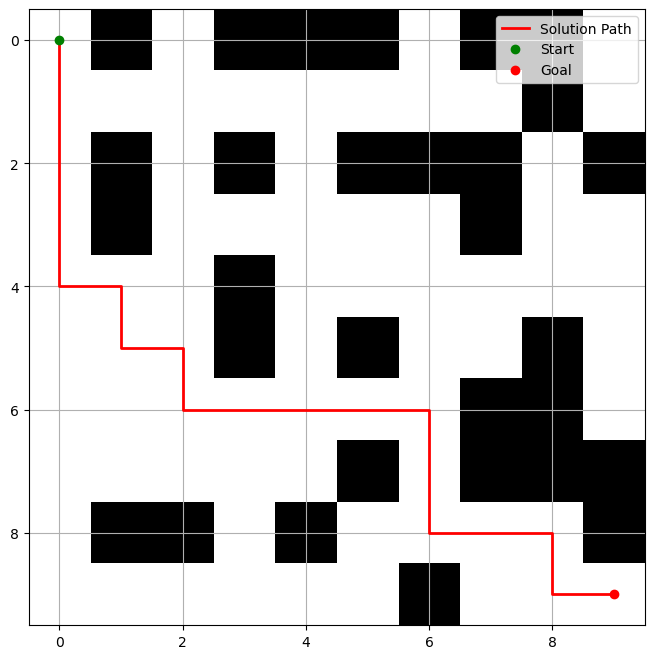

In [6]:
for name, algorithm in algorithms.items():
    path, metrics = algorithm(start_state)
    print(f"\n{name} Results:")
    if path:
        print(f"Path length: {len(path)}")
        print(f"Nodes expanded: {metrics['nodes_expanded']}")
        print(f"Max frontier size: {metrics['max_frontier']}")
        visualize_maze(game, path)
    else:
        print("No solution found!")

## Comparative Analysis

In [7]:
def run_experiment(size=10, n_trials=50, obstacle_ratios=[0.1, 0.2, 0.3, 0.4]):
    results = {}
    
    for obs_ratio in obstacle_ratios:
        results[obs_ratio] = {
            'Best-First Search': {'success': 0, 'avg_path': 0, 'avg_nodes': 0, 'avg_space': 0},
            'A* Search': {'success': 0, 'avg_path': 0, 'avg_nodes': 0, 'avg_space': 0},
            'Greedy Best-First': {'success': 0, 'avg_path': 0, 'avg_nodes': 0, 'avg_space': 0},
            'Uniform Cost Search': {'success': 0, 'avg_path': 0, 'avg_nodes': 0, 'avg_space': 0}
        }
        
        for trial in tqdm(range(n_trials), desc=f'Obstacle ratio: {obs_ratio}'):
            game = MazeGame(size, obs_ratio, seed=trial)
            agent = SearchAgent(game)
            start_state = game.get_state((0, 0))
            
            for name, algorithm in algorithms.items():
                path, metrics = algorithm(start_state)
                
                if path:
                    results[obs_ratio][name]['success'] += 1
                    results[obs_ratio][name]['avg_path'] += len(path)
                    results[obs_ratio][name]['avg_nodes'] += metrics['nodes_expanded']
                    results[obs_ratio][name]['avg_space'] += metrics['max_frontier']
                    
        for name in algorithms.keys():
            success = results[obs_ratio][name]['success']
            if success > 0:
                results[obs_ratio][name]['avg_path'] /= success
                results[obs_ratio][name]['avg_nodes'] /= success
                results[obs_ratio][name]['avg_space'] /= success
                
    return results

# Run experiments

In [8]:
results = run_experiment()


Obstacle ratio: 0.4: 100%|██████████| 50/50 [00:00<00:00, 319.67it/s]


In [9]:
import pandas as pd
df = pd.DataFrame.from_dict({(i, j): results[i][j] 
                            for i in results.keys() 
                            for j in results[i].keys()},
                            orient='index')

df

success  avg_path  avg_nodes  avg_space
0.1 Best-First Search         50      21.0      67.94      19.00
    A* Search                 50      19.0      53.34      16.94
    Greedy Best-First         50      21.0      67.94      19.00
    Uniform Cost Search       50      19.0      67.94       8.00
0.2 Best-First Search         50      21.0      67.96      19.00
    A* Search                 50      19.0      53.56      16.96
    Greedy Best-First         50      21.0      67.96      19.00
    Uniform Cost Search       50      19.0      67.96       8.00
0.3 Best-First Search         50      21.0      67.96      19.00
    A* Search                 50      19.0      53.56      16.96
    Greedy Best-First         50      21.0      67.96      19.00
    Uniform Cost Search       50      19.0      67.96       8.00
0.4 Best-First Search         50      21.0      68.00      19.00
    A* Search                 50      19.0      54.00      17.00
    Greedy Best-First         50      21.0      68.00      19.00
    Uniform Cost Search       50      19.0      68.00       8.00

### Plot results

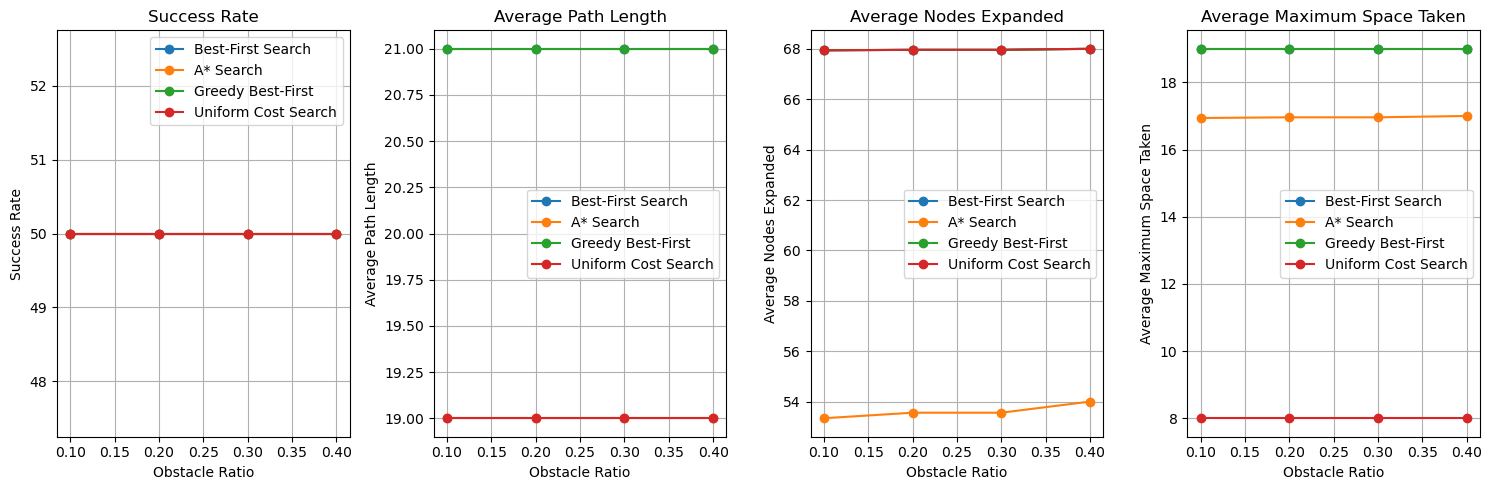

In [10]:
obstacle_ratios = list(results.keys())
algorithms = ['Best-First Search', 'A* Search', 'Greedy Best-First', 'Uniform Cost Search']
metrics = ['success', 'avg_path', 'avg_nodes', 'avg_space']
titles = ['Success Rate', 'Average Path Length', 'Average Nodes Expanded', 'Average Maximum Space Taken']

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, (metric, title) in enumerate(zip(metrics, titles)):
    for alg in algorithms:
        values = [results[r][alg][metric] for r in obstacle_ratios]
        axes[i].plot(obstacle_ratios, values, marker='o', label=alg)
        
    axes[i].set_xlabel('Obstacle Ratio')
    axes[i].set_ylabel(title)
    axes[i].set_title(title)
    axes[i].grid(True)
    axes[i].legend()
    
plt.tight_layout()
plt.show()